# Task 2

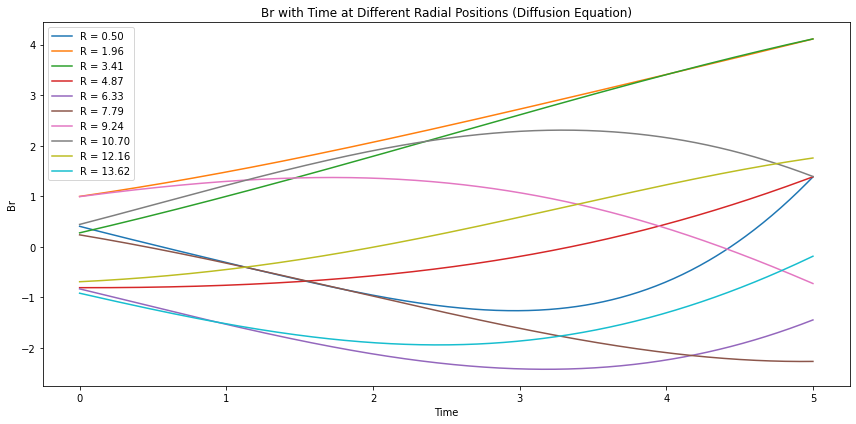

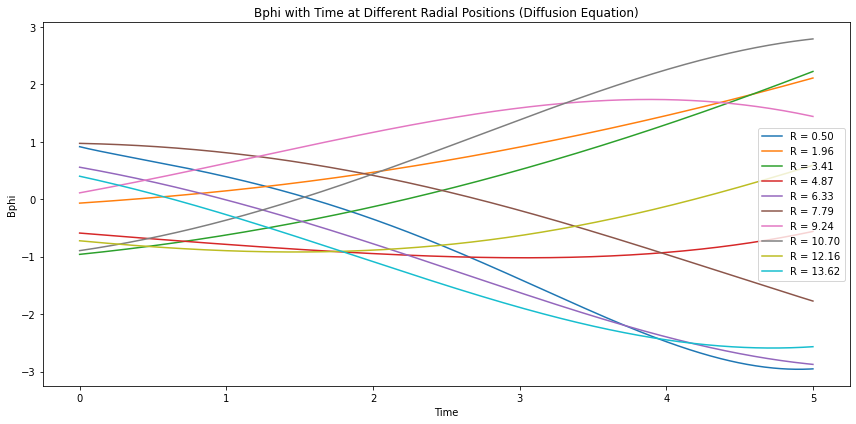

In [199]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
eta_t = 0.25# Increased turbulent magnetic diffusivity
np.random.seed(42)
# Radial grid
R_max = 15 # Maximum radial distance(in kpc)
Nr = 200  # Increased number of grid points in radial direction
dr = R_max / Nr

# Time parameters
T = 5 # Increased total time
Nt = 500 # Increased number of time steps
dt = T / Nt
h=1
# Initialize magnetic field B (considering only the radial component) with a larger seed field
R = np.linspace(0.5, R_max, Nr)
Br = np.sin((4 * np.pi * R)/R_max)
Bphi = np.cos(4 * np.pi * R / R_max)
#Br = np.exp(-R/R_max)
#Br = np.random.rand(Nr)
# Function to compute the radial Laplacian of B
def compute_laplacian_Br(R,Br,Bphi):
    alpha = 1
    return eta_t*(np.gradient((1/R)*np.gradient(R*Br, dr), dr) + ((np.pi)**2)*Br/(4*h**2)) -(2*alpha*Bphi/np.pi)

def compute_laplacian_Bphi(R,Br,Bphi):
    omega0 = 1
    r_omega = 1
    omega = omega0/(1+(R/r_omega)**2)**0.5
    q = ((R/r_omega)**2) * (1+(R/r_omega)**2)**(-1)
    return eta_t*(np.gradient((1/R)*np.gradient(R*Bphi, dr), dr) + ((np.pi)**2)*Br/(4*h**2)) - (q*omega*Br)

# Runge-Kutta method for solving the diffusion equation
def runge_kutta_step(R,Br,Bphi, dt):
    k1_Br = dt * compute_laplacian_Br(R,Br,Bphi)
    k1_Bphi = dt * compute_laplacian_Bphi(R,Br,Bphi)

    k2_Br = dt * compute_laplacian_Br(R + 0.5*k1_Br,Br + 0.5 * k1_Br, Bphi + 0.5*k1_Br)
    k2_Bphi = dt * compute_laplacian_Bphi(R + 0.5*k1_Bphi,Br + 0.5 * k1_Bphi, Bphi + 0.5*k1_Bphi)

    k3_Br = dt * compute_laplacian_Br(R + 0.5*k2_Br,Br + 0.5 * k2_Br, Bphi + 0.5*k2_Br)
    k3_Bphi = dt * compute_laplacian_Bphi(R + 0.5*k2_Bphi,Br + 0.5 * k2_Bphi, Bphi + 0.5*k2_Bphi)

    k4_Br = dt * compute_laplacian_Br(R + k3_Br,Br + k3_Br, Bphi + k3_Br)
    k4_Bphi = dt * compute_laplacian_Bphi(R + k3_Bphi,Br + k3_Bphi, Bphi + k3_Bphi)

    new_Br = Br + (k1_Br + 2 * k2_Br + 2 * k3_Br + k4_Br) / 6
    new_Bphi = Bphi + (k1_Bphi + 2 * k2_Bphi + 2 * k3_Bphi + k4_Bphi) / 6

    return new_Br, new_Bphi

# Store the evolution of magnetic field at different radial positions
evolution_Br = np.zeros((Nt + 1, Nr))
evolution_Bphi = np.zeros((Nt + 1, Nr))

# Time-stepping scheme using Runge-Kutta
for t in range(Nt + 1):
    evolution_Br[t, :] = np.copy(Br)
    evolution_Bphi[t, :] = np.copy(Bphi)
    Br, Bphi = runge_kutta_step(R,Br, Bphi, dt)

# Plot the magnetic field components Br and Bphi with time at different radial positions
plt.figure(figsize=(12, 6))
for i in range(0, Nr, Nr // 10):  # Plot every 10th radial position
    plt.plot(np.linspace(0, T, Nt + 1), evolution_Br[:, i], label=f'R = {R[i]:.2f}')
plt.xlabel('Time')
plt.ylabel('Br')
plt.title('Br with Time at Different Radial Positions (Diffusion Equation)')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for i in range(0, Nr, Nr // 10):  # Plot every 10th radial position
    plt.plot(np.linspace(0, T, Nt + 1), evolution_Bphi[:, i], label=f'R = {R[i]:.2f}')
plt.xlabel('Time')
plt.ylabel('Bphi')
plt.title('Bphi with Time at Different Radial Positions (Diffusion Equation)')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipykernel_26820\724068353.py:26: RuntimeWarning: overflow encountered in multiply
  return eta_t*(np.gradient((1/R)*np.gradient(R*Br, dr), dr) + ((np.pi)**2)*Br/(4*h**2)) -(2*alpha*Bphi/np.pi)
c:\python39\lib\site-packages\numpy\lib\function_base.py:1232: RuntimeWarning: invalid value encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipykernel_26820\724068353.py:31: RuntimeWarning: overflow encountered in square
  omega = omega0/(1+(R/r_omega)**2)**0.5
C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipykernel_26820\724068353.py:32: RuntimeWarning: overflow encountered in square
  q = ((R/r_omega)**2) * (1+(R/r_omega)**2)**(-1)
C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipykernel_26820\724068353.py:32: RuntimeWarning: invalid value encountered in multiply
  q = ((R/r_omega)**2) * (1+(R/r_omega)**2)**(-1)
C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipy

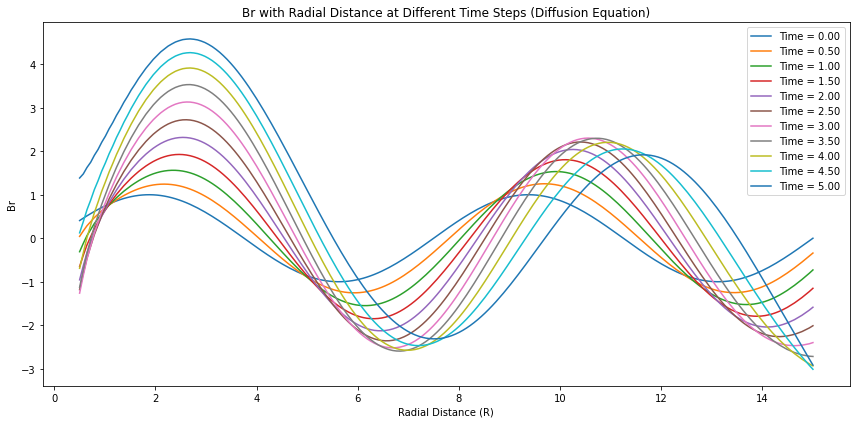

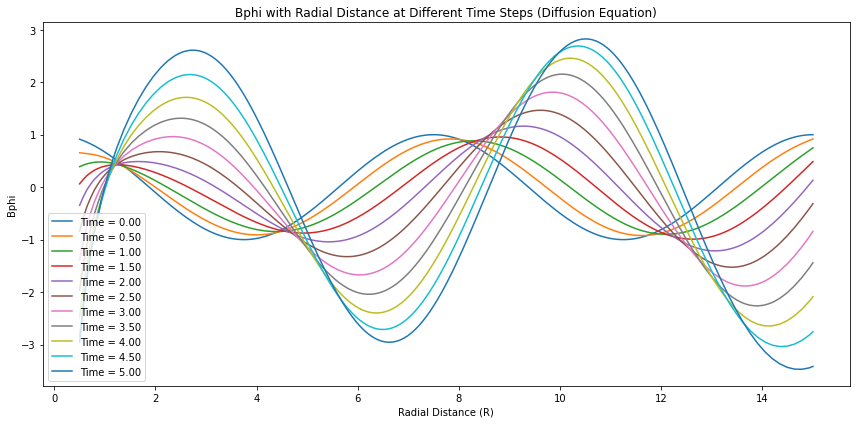

In [200]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
eta_t = 1 # Increased turbulent magnetic diffusivity
np.random.seed(42)
# Radial grid
R_max = 15 # Maximum radial distance(in kpc)
Nr = 200  # Increased number of grid points in radial direction
dr = R_max / Nr

# Time parameters
T = 5 # Increased total time
Nt = 500 # Increased number of time steps
dt = T / Nt
h=1
# Initialize magnetic field B (considering only the radial component) with a larger seed field
R = np.linspace(0.5, R_max, Nr)
Br = np.sin((4 * np.pi * R)/R_max)
Bphi = np.cos(4 * np.pi * R / R_max)
#Br = np.exp(-R/R_max)
#Br = np.random.rand(Nr)
# Function to compute the radial Laplacian of B
def compute_laplacian_Br(R,Br,Bphi):
    alpha = 1
    return eta_t*(np.gradient((1/R)*np.gradient(R*Br, dr), dr) + ((np.pi)**2)*Br/(4*h**2)) -(2*alpha*Bphi/np.pi)

def compute_laplacian_Bphi(R,Br,Bphi):
    omega0 = 50
    r_omega = 10
    omega = omega0/(1+(R/r_omega)**2)**0.5
    q = ((R/r_omega)**2) * (1+(R/r_omega)**2)**(-1)
    return eta_t*(np.gradient((1/R)*np.gradient(R*Bphi, dr), dr) + ((np.pi)**2)*Br/(4*h**2)) - (q*omega*Br)

# Runge-Kutta method for solving the diffusion equation
def runge_kutta_step(R,Br,Bphi, dt):
    k1_Br = dt * compute_laplacian_Br(R,Br,Bphi)
    k1_Bphi = dt * compute_laplacian_Bphi(R,Br,Bphi)

    k2_Br = dt * compute_laplacian_Br(R + 0.5*k1_Br,Br + 0.5 * k1_Br, Bphi + 0.5*k1_Br)
    k2_Bphi = dt * compute_laplacian_Bphi(R + 0.5*k1_Bphi,Br + 0.5 * k1_Bphi, Bphi + 0.5*k1_Bphi)

    k3_Br = dt * compute_laplacian_Br(R + 0.5*k2_Br,Br + 0.5 * k2_Br, Bphi + 0.5*k2_Br)
    k3_Bphi = dt * compute_laplacian_Bphi(R + 0.5*k2_Bphi,Br + 0.5 * k2_Bphi, Bphi + 0.5*k2_Bphi)

    k4_Br = dt * compute_laplacian_Br(R + k3_Br,Br + k3_Br, Bphi + k3_Br)
    k4_Bphi = dt * compute_laplacian_Br(R + k3_Bphi,Br + k3_Bphi, Bphi + k3_Bphi)

    new_Br = Br + (k1_Br + 2 * k2_Br + 2 * k3_Br + k4_Br) / 6
    new_Bphi = Bphi + (k1_Bphi + 2 * k2_Bphi + 2 * k3_Bphi + k4_Bphi) / 6

    return new_Br, new_Bphi

# Store the evolution of magnetic field at different radial positions
evolution_at_r = np.zeros((Nt + 1, Nr))

# Time-stepping scheme using Runge-Kutta
for t in range(Nt + 1):
    evolution_at_r[t, :] = np.copy(Br[0])  # Extracting new_Br from the tuple
    Br, Bphi = runge_kutta_step(R, Br, Bphi, dt)  # Update Br and Bphi

# Plot the magnetic field components Br and Bphi with time at different radial positions
# Plot Br with respect to radial distance R at different time steps
plt.figure(figsize=(12, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(R, evolution_Br[t, :], label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (R)')
plt.ylabel('Br')
plt.title('Br with Radial Distance at Different Time Steps (Diffusion Equation)')
plt.legend()
plt.tight_layout()
plt.show()

# Plot Bphi with respect to radial distance R at different time steps
plt.figure(figsize=(12, 6))
for t in range(0, Nt + 1, Nt // 10):  # Plot every 10th time step
    plt.plot(R, evolution_Bphi[t, :], label=f'Time = {t * dt:.2f}')
plt.xlabel('Radial Distance (R)')
plt.ylabel('Bphi')
plt.title('Bphi with Radial Distance at Different Time Steps (Diffusion Equation)')
plt.legend()
plt.tight_layout()
plt.show()




MovieWriter imagemagick unavailable; using Pillow instead.


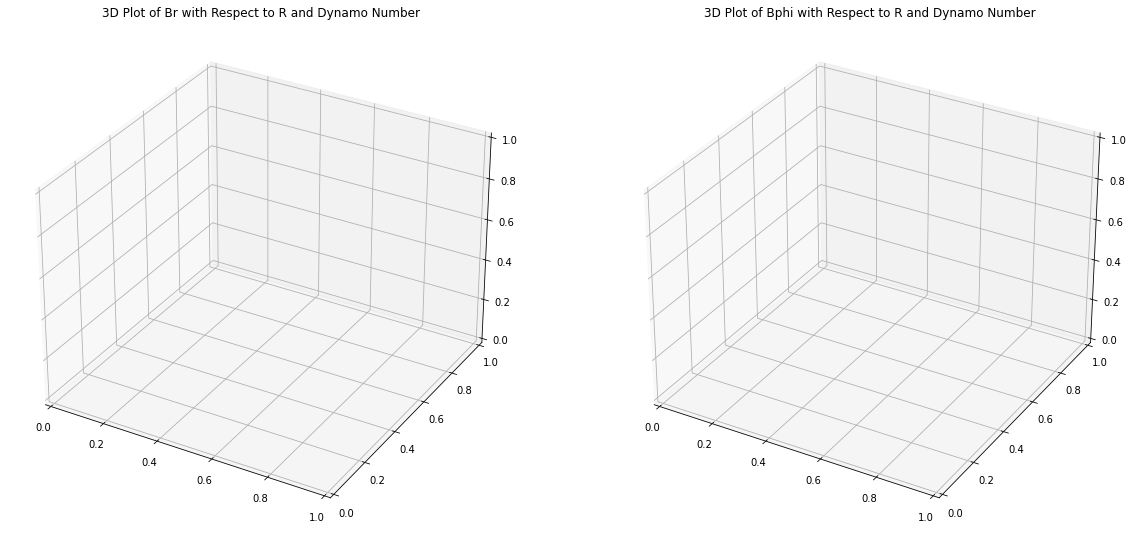

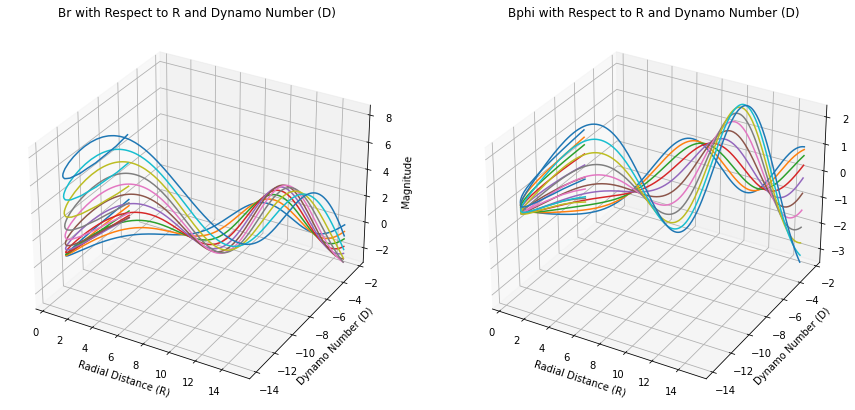

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Increased turbulent magnetic diffusivity
np.random.seed(42)
# Radial grid
R_max = 15  # Maximum radial distance (in kpc)
Nr = 200  # Increased number of grid points in radial direction
dr = R_max / Nr

# Time parameters
T = 5  # Increased total time
Nt = 500  # Increased number of time steps
dt = T / Nt
h = 1

# Function to compute the radial Laplacian of Bphi
def compute_laplacian_Bphi(R, Br, Bphi, omega0):
    r_omega = 1
    omega = omega0 / np.sqrt(1 + (R / r_omega)**2)
    q = (R / r_omega)**2 / (1 + (R / r_omega)**2)
    return eta_t * (np.gradient((1/R) * np.gradient(R * Bphi, dr), dr) + ((np.pi)**2) * Br / (4 * h**2)) - (q * omega * Br)

# Function to compute the radial Laplacian of Br
def compute_laplacian_Br(R, Br, Bphi, alpha):
    return eta_t * (np.gradient((1/R) * np.gradient(R * Br, dr), dr) + ((np.pi)**2) * Br / (4 * h**2)) - (2 * alpha * Bphi / np.pi)

# Runge-Kutta method for solving the diffusion equation
def runge_kutta_step(R, Br, Bphi, dt, alpha, omega0):
    k1_Br = dt * compute_laplacian_Br(R, Br, Bphi, alpha)
    k1_Bphi = dt * compute_laplacian_Bphi(R, Br, Bphi, omega0)

    k2_Br = dt * compute_laplacian_Br(R + 0.5*k1_Br, Br + 0.5*k1_Br, Bphi + 0.5*k1_Br, alpha)
    k2_Bphi = dt * compute_laplacian_Bphi(R + 0.5*k1_Bphi, Br + 0.5*k1_Bphi, Bphi + 0.5*k1_Bphi, omega0)

    k3_Br = dt * compute_laplacian_Br(R + 0.5*k2_Br, Br + 0.5*k2_Br, Bphi + 0.5*k2_Br, alpha)
    k3_Bphi = dt * compute_laplacian_Bphi(R + 0.5*k2_Bphi, Br + 0.5*k2_Bphi, Bphi + 0.5*k2_Bphi, omega0)

    k4_Br = dt * compute_laplacian_Br(R + k3_Br, Br + k3_Br, Bphi + k3_Br, alpha)
    k4_Bphi = dt * compute_laplacian_Bphi(R + k3_Bphi, Br + k3_Bphi, Bphi + k3_Bphi, omega0)

    new_Br = Br + (k1_Br + 2*k2_Br + 2*k3_Br + k4_Br) / 6
    new_Bphi = Bphi + (k1_Bphi + 2*k2_Bphi + 2*k3_Bphi + k4_Bphi) / 6

    return new_Br, new_Bphi

# Parameters for different values of eta_t
eta_t = 0.25

alpha_values = [0.2, 0.5, 1.5]
omega_values = [0.2, 0.5, 1.5]

r_omega = 1

fig = plt.figure(figsize=(20, 10))

# Plot for Br
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title('3D Plot of Br with Respect to R and Dynamo Number')

# Plot for Bphi
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title('3D Plot of Bphi with Respect to R and Dynamo Number')

def update(frame):
    ax1.clear()
    ax2.clear()

    alpha_index = frame // len(omega_values)
    omega_index = frame % len(omega_values)

    alpha = alpha_values[alpha_index]
    omega0 = omega_values[omega_index]

    np.random.seed(42)

    omega = omega0 / np.sqrt(1 + (R / r_omega)**2)
    q = (R / r_omega)**2 / (1 + (R / r_omega)**2)

    Br = np.sin(4 * np.pi * R / R_max)
    Bphi = np.cos(4 * np.pi * R / R_max)

    evolution_Br = np.zeros((Nt + 1, Nr))
    evolution_Bphi = np.zeros((Nt + 1, Nr))

    for t in range(Nt + 1):
        evolution_Br[t, :] = np.copy(Br)
        evolution_Bphi[t, :] = np.copy(Bphi)
        Br, Bphi = runge_kutta_step(R, Br, Bphi, dt, alpha, omega0)

    # Plot Br with respect to R and D
    for t in range(0, Nt + 1, Nt // 10):
        D = -alpha * q * omega * h**3 / eta_t**2
        ax1.plot(R, np.full_like(R, D), evolution_Br[t, :])

    # Plot Bphi with respect to R and D
    for t in range(0, Nt + 1, Nt // 10):
        D = -alpha * q * omega * h**3 / eta_t**2
        ax2.plot(R, np.full_like(R, D), evolution_Bphi[t, :])

    ax1.set_title('Br with Respect to R and Dynamo Number (D)')
    ax2.set_title('Bphi with Respect to R and Dynamo Number (D)')

    ax1.set_xlabel('Radial Distance (R)')
    ax1.set_ylabel('Dynamo Number (D)')

    ax2.set_xlabel('Radial Distance (R)')
    ax2.set_ylabel('Dynamo Number (D)')

    ax1.set_zlabel('Magnitude')
    ax2.set_zlabel('Magnitude')

# Create subplots for Br and Bphi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), subplot_kw={'projection': '3d'})

# Number of frames for the animation
num_frames = len(alpha_values) * len(omega_values)

# Create the animation
ani = FuncAnimation(fig, update, frames=num_frames, interval=600)

# Save the animation as a gif
ani.save('3d_animation.gif', writer='imagemagick')

plt.show()

Critical Dynamo Number (|Dc|): -3.8252746987024038


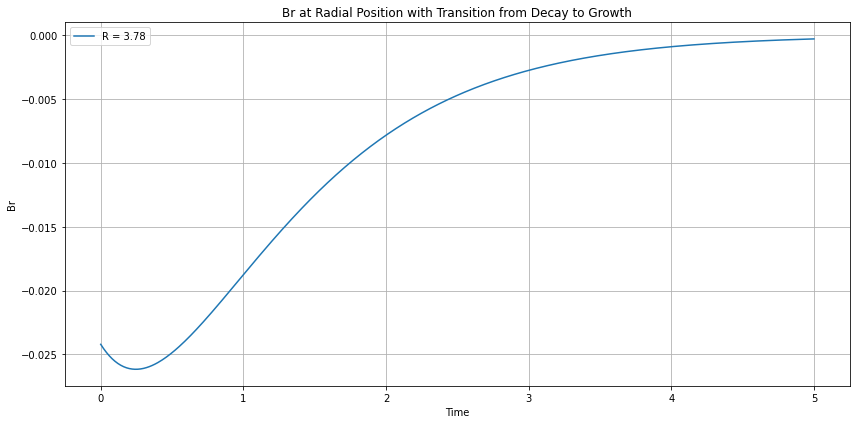

In [184]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
eta_t = 0.25  # Increased turbulent magnetic diffusivity
alpha0 = 1  # Amplitude of the alpha effect
np.random.seed(42)

# Radial grid
R_max = 15  # Maximum radial distance (in kpc)
Nr = 200  # Increased number of grid points in radial direction
dr = R_max / Nr

# Time parameters
T = 5 # Increased total time
Nt = 500  # Increased number of time steps
dt = T / Nt
h = 1

# Initialize magnetic field B (considering only the radial component) with a larger seed field
R = np.linspace(0.5, R_max, Nr)
Br = np.sin((4 * np.pi * R) / R_max)

# Function to compute the radial Laplacian of B (only for Br)
def compute_laplacian_Br(R, Br):
    return eta_t * (np.gradient((1/R) * np.gradient(R * Br, dr), dr) - ((np.pi)**2) * Br / (4 * h**2)) - (2 * alpha0 * Br / np.pi)

# Runge-Kutta method for solving the diffusion equation
def runge_kutta_step(R, Br, dt):
    k1_Br = dt * compute_laplacian_Br(R, Br)

    k2_Br = dt * compute_laplacian_Br(R + 0.5 * k1_Br, Br + 0.5 * k1_Br)
    k3_Br = dt * compute_laplacian_Br(R + 0.5 * k2_Br, Br + 0.5 * k2_Br)
    k4_Br = dt * compute_laplacian_Br(R + k3_Br, Br + k3_Br)

    new_Br = Br + (k1_Br + 2 * k2_Br + 2 * k3_Br + k4_Br) / 6

    return new_Br

# Store the evolution of magnetic field at different radial positions (only Br)
evolution_Br = np.zeros((Nt + 1, Nr))

# Time-stepping scheme using Runge-Kutta (only for Br)
for t in range(Nt + 1):
    evolution_Br[t, :] = np.copy(Br)
    Br = runge_kutta_step(R, Br, dt)

# Function to find the critical dynamo number numerically using only Br
def find_critical_dynamo_number(R, evolution_Br):
    critical_dynamo_number = None
    for i in range(Nr):
        D = -alpha0 * (R[i] / 1)**2 * (1 + (R[i] / 1)**2)**(-1) * (1 / np.sqrt(1 + (R[i] / 1)**2)) * h**3 / (eta_t**2)
        if np.all(evolution_Br[:, i] < 0):
            if critical_dynamo_number is None or np.abs(D) > np.abs(critical_dynamo_number):
                critical_dynamo_number = D
    return critical_dynamo_number

# Find the critical dynamo number numerically using only Br
critical_dynamo_number = find_critical_dynamo_number(R, evolution_Br)
print("Critical Dynamo Number (|Dc|):", critical_dynamo_number)

# Find the radial position where exponential decay becomes exponential growth
critical_R_index = None
for i in range(Nr):
    if np.all(evolution_Br[:, i] < 0):
        critical_R_index = i
        break

if critical_R_index is not None:
    # Plot Br at the radial position where exponential decay becomes exponential growth
    plt.figure(figsize=(12, 6))
    plt.plot(np.linspace(0, T, Nt + 1), evolution_Br[:, critical_R_index], label=f'R = {R[critical_R_index]:.2f}')
    plt.xlabel('Time')
    plt.ylabel('Br')
    plt.title('Br at Radial Position with Transition from Decay to Growth')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Exponential decay does not become exponential growth in the given range.")


Critical Dynamo Number (|Dc|): -3.8252746987024038


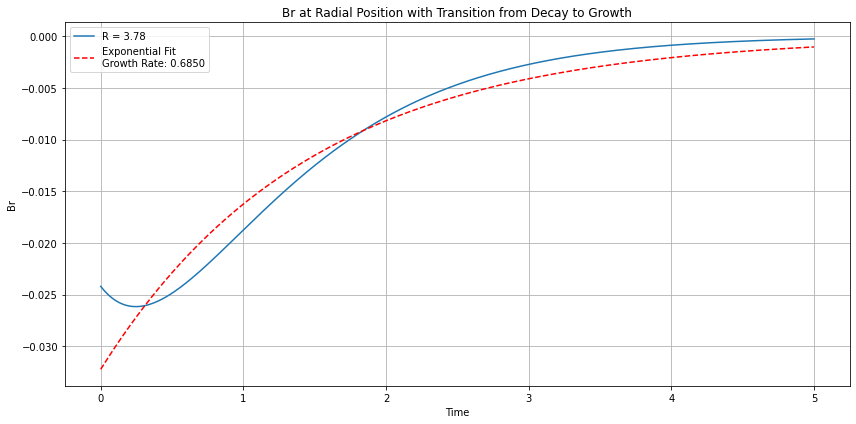

In [191]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Parameters
eta_t = 0.25  # Increased turbulent magnetic diffusivity
alpha0 = 1  # Amplitude of the alpha effect
np.random.seed(42)

# Radial grid
R_max = 15  # Maximum radial distance (in kpc)
Nr = 200  # Increased number of grid points in radial direction
dr = R_max / Nr

# Time parameters
T = 5 # Increased total time
Nt = 500  # Increased number of time steps
dt = T / Nt
h = 1

# Initialize magnetic field B (considering only the radial component) with a larger seed field
R = np.linspace(0.5, R_max, Nr)
Br = np.sin((4 * np.pi * R) / R_max)

# Function to compute the radial Laplacian of B (only for Br)
def compute_laplacian_Br(R, Br):
    return eta_t * (np.gradient((1/R) * np.gradient(R * Br, dr), dr) - ((np.pi)**2) * Br / (4 * h**2)) - (2 * alpha0 * Br / np.pi)

# Runge-Kutta method for solving the diffusion equation
def runge_kutta_step(R, Br, dt):
    k1_Br = dt * compute_laplacian_Br(R, Br)

    k2_Br = dt * compute_laplacian_Br(R + 0.5 * k1_Br, Br + 0.5 * k1_Br)
    k3_Br = dt * compute_laplacian_Br(R + 0.5 * k2_Br, Br + 0.5 * k2_Br)
    k4_Br = dt * compute_laplacian_Br(R + k3_Br, Br + k3_Br)

    new_Br = Br + (k1_Br + 2 * k2_Br + 2 * k3_Br + k4_Br) / 6

    return new_Br

# Store the evolution of magnetic field at different radial positions (only Br)
evolution_Br = np.zeros((Nt + 1, Nr))

# Time-stepping scheme using Runge-Kutta (only for Br)
for t in range(Nt + 1):
    evolution_Br[t, :] = np.copy(Br)
    Br = runge_kutta_step(R, Br, dt)

# Function to find the critical dynamo number numerically using only Br
def find_critical_dynamo_number(R, evolution_Br):
    critical_dynamo_number = None
    for i in range(Nr):
        D = -alpha0 * (R[i] / 1)**2 * (1 + (R[i] / 1)**2)**(-1) * (1 / np.sqrt(1 + (R[i] / 1)**2)) * h**3 / (eta_t**2)
        if np.all(evolution_Br[:, i] < 0):
            if critical_dynamo_number is None or np.abs(D) > np.abs(critical_dynamo_number):
                critical_dynamo_number = D
    return critical_dynamo_number

# Find the critical dynamo number numerically using only Br
critical_dynamo_number = find_critical_dynamo_number(R, evolution_Br)
print("Critical Dynamo Number (|Dc|):", critical_dynamo_number)

# Find the radial position where exponential decay becomes exponential growth
critical_R_index = None
for i in range(Nr):
    if np.all(evolution_Br[:, i] < 0):
        critical_R_index = i
        break

if critical_R_index is not None:
    # Plot Br at the radial position where exponential decay becomes exponential growth
    plt.figure(figsize=(12, 6))
    plt.plot(np.linspace(0, T, Nt + 1), evolution_Br[:, critical_R_index], label=f'R = {R[critical_R_index]:.2f}')
    plt.xlabel('Time')
    plt.ylabel('Br')
    plt.title('Br at Radial Position with Transition from Decay to Growth')
    plt.legend()

    plt.grid(True)
    plt.tight_layout()

    # Fit an exponential function to the data
    time_points = np.linspace(0, T, Nt + 1)
    Br_data = evolution_Br[:, critical_R_index]

    def exponential_growth(t, A, tau):
        return A * np.exp(tau * t)

    popt, pcov = curve_fit(exponential_growth, time_points, Br_data)
    plt.plot(time_points, exponential_growth(time_points, *popt), 'r--', label=f'Exponential Fit\nGrowth Rate: {np.abs(popt[1]):.4f}')
    plt.legend()
    plt.show()

else:
    print("Exponential decay does not become exponential growth in the given range.")
